In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/apple/과실생산량_성과수미과수__1980_2021.csv', encoding='cp949')

df.columns = ['년', '지역', '면적 (ha)', '10a당 생산량 (kg)', '생산량 (톤)']

In [3]:
# 정수형으로 변환
new_df = df.replace('-', 0)
new_df[['면적 (ha)', '10a당 생산량 (kg)', '생산량 (톤)']] = new_df[['면적 (ha)', '10a당 생산량 (kg)', '생산량 (톤)']].astype(int)

# 세종시 충남 자료로 통합
new_df = new_df.replace('세종특별자치시', '충청남도')
new_df = new_df.groupby(['년', '지역'], as_index=False).sum()

new_df.to_csv('data/done/apple.csv', encoding='cp949', index=False)

<AxesSubplot:xlabel='년', ylabel='10a당 생산량 (kg)'>

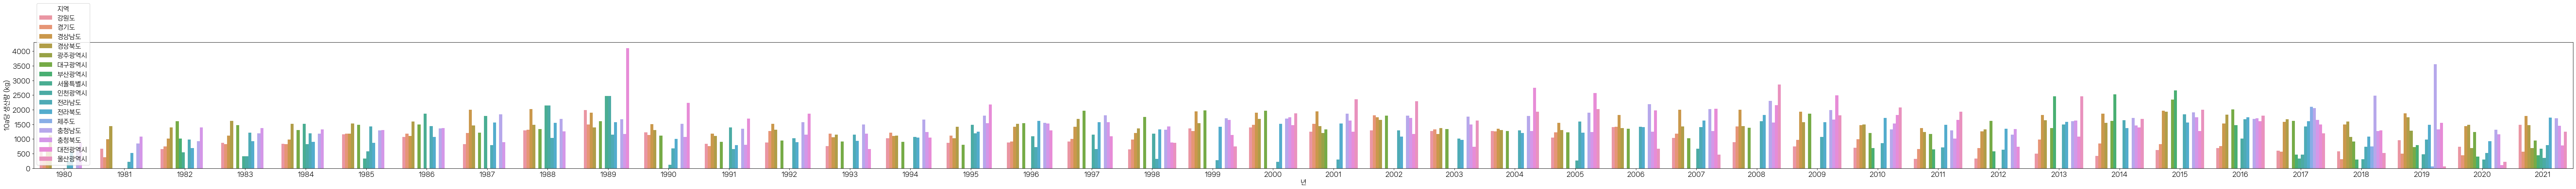

In [4]:
fig = plt.figure(figsize=(100, 5))
sns.barplot(x=new_df['년'], y=new_df['10a당 생산량 (kg)'], hue=new_df['지역'])
# plt.legend('', frameon=False)

In [5]:
new_df.sample(3)

,년,지역,면적 (ha),10a당 생산량 (kg),생산량 (톤)
98,1987,대구광역시,425,1212,5151
424,2008,인천광역시,2,0,0
218,1995,인천광역시,5,1480,74


# Merge Test

In [6]:
pressure = pd.read_csv('data/done/pressure.csv', encoding='cp949')

In [7]:
## 요기 ##
new_pressure = round(pressure.groupby(['년', '지역']).mean(), 1).drop(columns='월').reset_index()

In [8]:
data = new_df.merge(new_pressure, on=['년', '지역'])

In [9]:
data.sample(3)

,년,지역,면적 (ha),10a당 생산량 (kg),생산량 (톤),평균현지기압(hPa),평균해면기압(hPa),최고해면기압(hPa),최저해면기압(hPa)
216,1995,부산광역시,0,0,0,1003.8,1012.1,1021.5,998.1
521,2014,전라남도,308,1642,5058,1012.0,1012.5,1021.5,1000.6
174,1992,전라남도,237,1031,2443,1010.8,1012.5,1022.9,1001.3


Text(0, 0.5, '평균현지기압(hPa)')

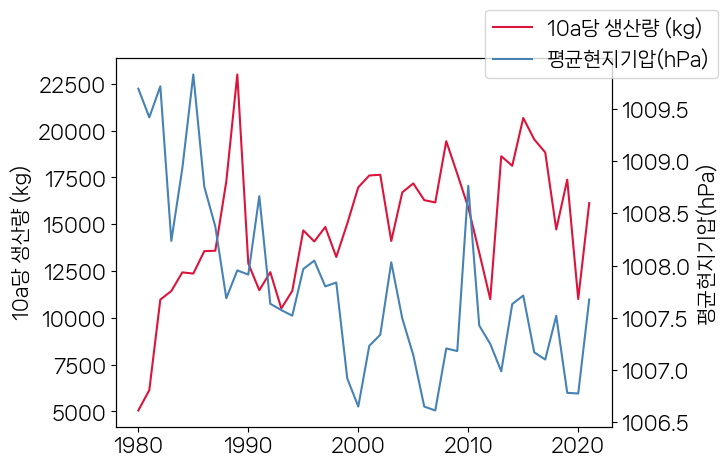

In [10]:
fig, axe1 = plt.subplots()
axe2 = axe1.twinx()

a1 = sns.lineplot(ax=axe1, x=data['년'].unique(), y=data.groupby('년')['10a당 생산량 (kg)'].sum(), color='crimson')
a2 = sns.lineplot(ax=axe2, x=data['년'].unique(), y=data.groupby('년')['평균현지기압(hPa)'].mean(), color='steelblue')

fig.legend(['10a당 생산량 (kg)', '평균현지기압(hPa)'])

axe1.set_ylabel('10a당 생산량 (kg)')
axe2.set_ylabel('평균현지기압(hPa)')

In [11]:
wind = pd.read_csv('data/done/wind_all.csv', encoding='cp949')
new_wind = round(wind.groupby(['년', '지역']).mean(), 1).drop(columns='월').reset_index()

In [12]:
data = data.merge(new_wind, on=['년', '지역'])

Text(0, 0.5, '평균풍속(m/s)')

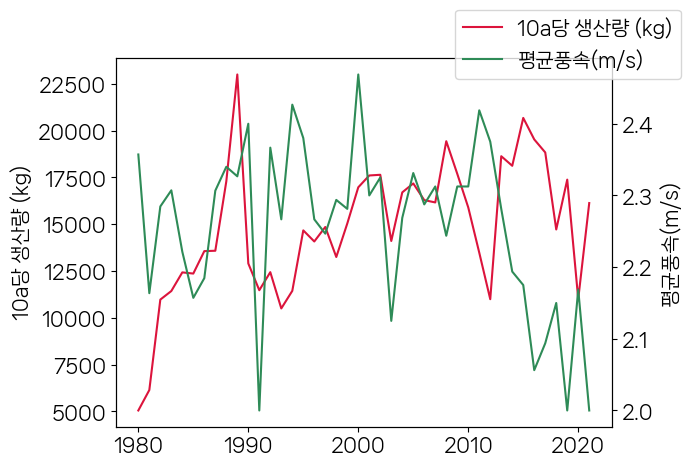

In [13]:
fig, axe1 = plt.subplots()
axe2 = axe1.twinx()

a1 = sns.lineplot(ax=axe1, x=data['년'].unique(), y=data.groupby('년')['10a당 생산량 (kg)'].sum(), color='crimson')
# a2 = sns.lineplot(ax=axe2, x=data['년'].unique(), y=data.groupby('년')['평균현지기압(hPa)'].mean(), color='steelblue')
a2 = sns.lineplot(ax=axe2, x=data['년'].unique(), y=data.groupby('년')['평균풍속(m/s)'].mean(), color='seagreen')

# fig.legend(['10a당 생산량 (kg)', '평균현지기압(hPa)', ])
fig.legend(['10a당 생산량 (kg)', '평균풍속(m/s)', ])

axe1.set_ylabel('10a당 생산량 (kg)')
# axe2.set_ylabel('평균현지기압(hPa)')
axe2.set_ylabel('평균풍속(m/s)')


Text(0, 0.5, '합계일조시간(hr)')

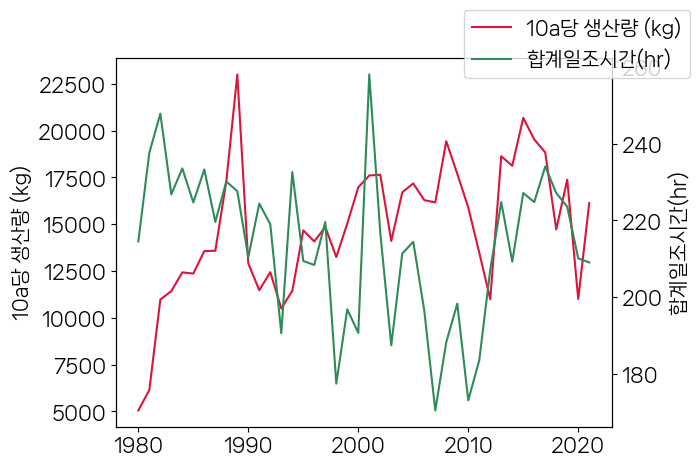

In [14]:
wind = pd.read_csv('data/done/sun.csv', encoding='cp949')
new_wind = round(wind.groupby(['년', '지역']).mean(), 1).drop(columns='월').reset_index()
data = data.merge(new_wind, on=['년', '지역'])

fig, axe1 = plt.subplots()
axe2 = axe1.twinx()

a1 = sns.lineplot(ax=axe1, x=data['년'].unique(), y=data.groupby('년')['10a당 생산량 (kg)'].sum(), color='crimson')
# a2 = sns.lineplot(ax=axe2, x=data['년'].unique(), y=data.groupby('년')['평균현지기압(hPa)'].mean(), color='steelblue')
a2 = sns.lineplot(ax=axe2, x=data['년'].unique(), y=data.groupby('년')['합계일조시간(hr)'].mean(), color='seagreen')

# fig.legend(['10a당 생산량 (kg)', '평균현지기압(hPa)', ])
fig.legend(['10a당 생산량 (kg)', '합계일조시간(hr)', ])

axe1.set_ylabel('10a당 생산량 (kg)')
# axe2.set_ylabel('평균현지기압(hPa)')
axe2.set_ylabel('합계일조시간(hr)')
